In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = "SELECT * FROM county_diversity;"
df = pd.read_sql(qry, con)
df.head()

,GISJOIN,pwhite10,pblack10,pasian10,phisp10,pother10,theil10,theil210,pwhite00,pblack00,...,pother00,theil00,theil200,pwhite90,pblack90,pasian90,phisp90,pother90,theil90,theil290
0,G0100010,0.772462,0.175826,0.008961,0.024005,0.004801,0.662470,0.456962,0.797373,0.170110,...,0.005266,0.594427,0.398029,0.788881,0.198875,0.003449,0.006720,0.002075,0.574266,0.401210
1,G0100030,0.835048,0.093084,0.007785,0.043848,0.007632,0.583661,0.400694,0.860791,0.102247,...,0.006103,0.486592,0.300823,0.852666,0.128124,0.002198,0.010399,0.006614,0.493293,0.306809
2,G0100050,0.467531,0.466912,0.004771,0.050515,0.002659,0.903147,0.859725,0.509257,0.460405,...,0.004236,0.809245,0.750853,0.552933,0.438923,0.001692,0.004879,0.001574,0.735968,0.679801
3,G0100070,0.750207,0.219245,0.001266,0.017718,0.003666,0.648795,0.489361,0.762032,0.220105,...,0.002209,0.606501,0.452077,0.786280,0.209204,0.000662,0.002348,0.001505,0.545190,0.389755
4,G0100090,0.888873,0.012630,0.002320,0.080702,0.005582,0.406089,0.386048,0.921117,0.011719,...,0.004430,0.317693,0.284999,0.975208,0.013222,0.000841,0.007286,0.003443,0.143022,0.076751


/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


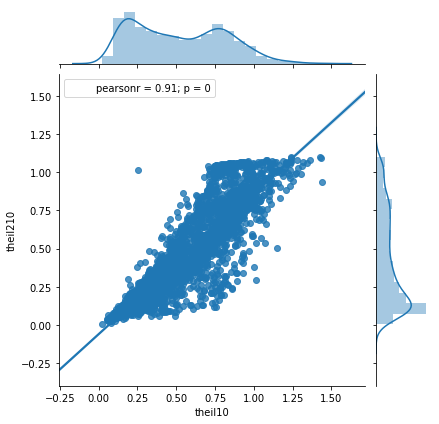

In [3]:
# compare diversity calculated using Bellman et al groups and calculated excluding asian and other
# df.plot.scatter("theil10", "theil210")
sns.jointplot('theil10', 'theil210', df, kind="reg")

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


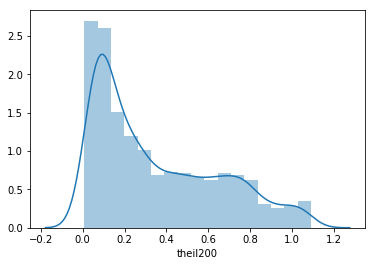

In [4]:
sns.distplot(df['theil200'])

# Join diversity to population change

In [5]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.*, 
B.CL8AA1990 AS pop90,
B.CL8AA2000 AS pop00,
B.CL8AA2010 AS pop10,
C.metro_status,
C.economic_type_label
FROM county_diversity AS A JOIN nhgis_pop_race_norm_90_10 AS B
ON A.GISJOIN = B.GISJOIN
JOIN usda_typology_2015 AS C ON B.STATEA || B.COUNTYA = C.fips;
'''
df = pd.read_sql(qry, con)
len(df)

3143

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


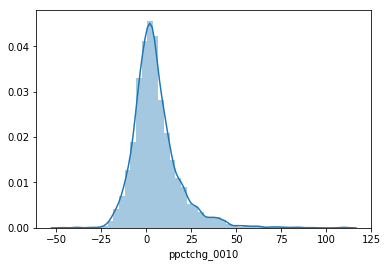

In [6]:
# calc pop change
df['ppctchg_0010'] = ( df['pop10'] - df['pop00'] ) * 1.0 / df['pop00'] * 100
df['ppctchg_0010_ln'] = np.log(df['ppctchg_0010'] + 100)
sns.distplot(df['ppctchg_0010'])

In [7]:
df['ppctchg_0010'].describe()

count    3143.000000
mean        5.249544
std        13.192471
min       -46.604856
25%        -2.558316
50%         3.179515
75%        10.223635
max       110.351356
Name: ppctchg_0010, dtype: float64

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


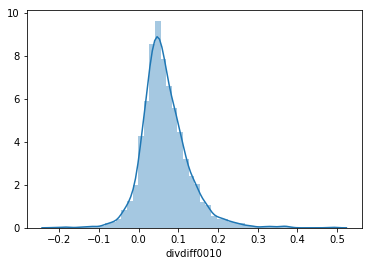

In [8]:
# compare pop change to change in diversity
df['divdiff0010'] = df['theil10'] - df['theil00']
# calc as pct change
# df['divdiff0010'] = (df['theil10'] - df['theil00']) * 1.0 / df['theil00']
sns.distplot(df['divdiff0010'])

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


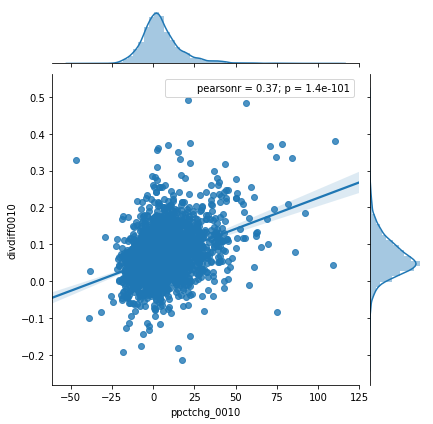

In [9]:
# compare pop change to change in diversity
# df['divdiff0010'] = df['theil10'] - df['theil90']
sns.jointplot('ppctchg_0010', 'divdiff0010', df, kind="reg")

In [10]:
# use second measure of diversity
# df['divdiff0010'] = df['theil210'] - df['theil200']
# sns.jointplot('ppctchg_0010', 'divdiff0010', df, kind="reg")

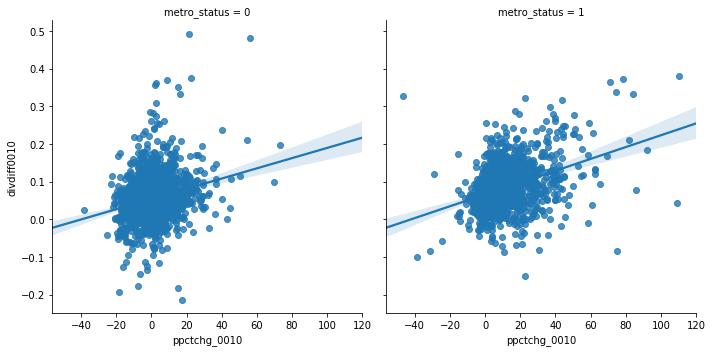

In [11]:
# separate metro status
sns.lmplot('ppctchg_0010', 'divdiff0010', df, col='metro_status')

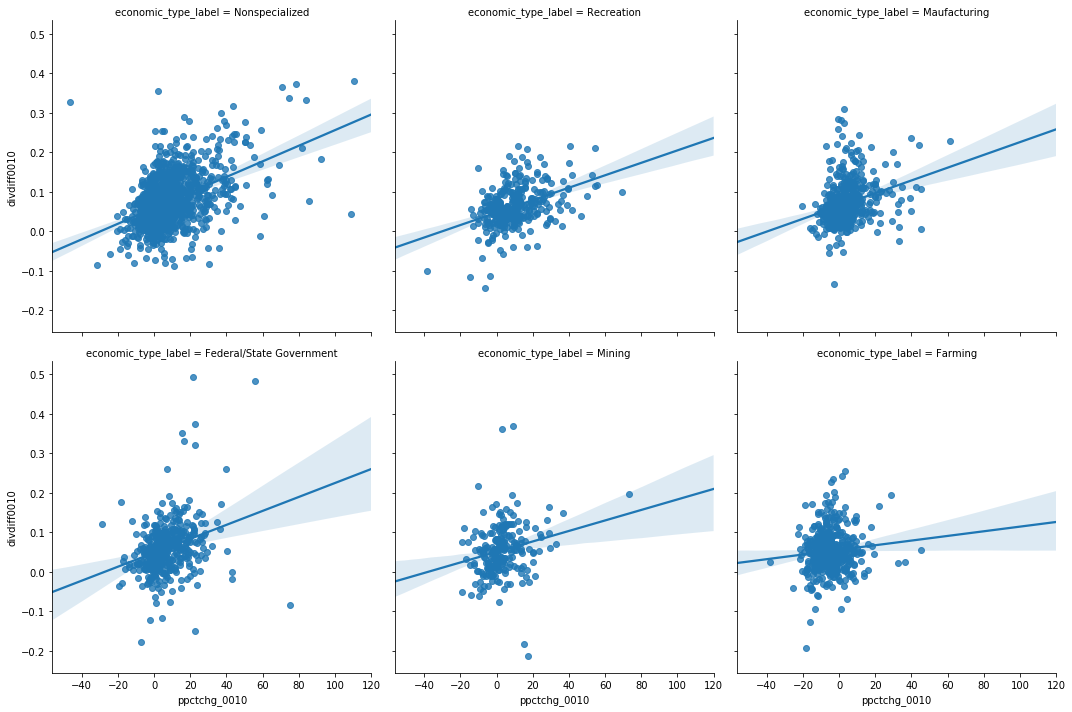

In [12]:
# separate metro status
sns.lmplot('ppctchg_0010', 'divdiff0010', df, col='economic_type_label', col_wrap=3)